# Sympy

記号計算を行うためのライブラリ

numpyと同じようにインポートして使う

In [1]:
from sympy import *

## 記号の定義と表示

まずは記号（Symbolオブジェクト）の定義

In [2]:
x, y, z, a, b = symbols('x y z a b') # 括弧内はスペースかコンマで区切る

In [3]:
type(x)

sympy.core.symbol.Symbol

これでint型やfloat型と同じように演算ができる

In [4]:
x + x + y

2*x + y

In [5]:
x**2 + 2*x*y + y**2

x**2 + 2*x*y + y**2

計算をさせるだけならこれで良いけど見にくい！

こんなときはSympyのpretty printingの機能を使う

In [6]:
init_printing()

In [7]:
x**2 + 2*x*y + y**2

次の例を考える．

In [8]:
x = symbols('x')
expr = x + 1
x = 2
expr

In [9]:
type(x)

int

`x = 2`という操作は確かに`x`をint型に変えているが，`expr`は変わらない

`expr`という名前が作られた時点では`x`はsymbolであり，その後で`x`の割り当てを変更しても`expr`に影響しないことがわかる

（注）この振舞いはSympyに限ったことではない

`x`に2を代入した上で`x + 1`を計算したいときには…？

In [10]:
x = symbols('x')
expr = x + 1
expr.subs(x,2)

In [12]:
expr

`expr`は元の定義のまま保持される

ところで，記号`x`と整数の間の加法はどう扱われているのか？

In [15]:
a = x + 2.0 -x
a

In [16]:
type(a)

sympy.core.numbers.Float

記号を含む演算が行われた時点で整数は自動的にSympyのInt型に変換される

## 等式の扱い

日常で等式を書くときには`=`という記号を使うが，Pythonではこの記号はオブジェクトに対する名前の割り当てに使われる

また，`==`は両辺が同じオブジェクトかどうかを判定するときに使う

Sympyでは等式も一つのオブジェクトとして扱う

例えば$x+1=4$という式は以下のように書く

In [17]:
eq = Eq(x+1, 4)
eq

In [18]:
type(eq)

sympy.core.relational.Equality

特に`==`の扱いには注意

$(x+1)^2 = x^2+2x+1$の両辺が等しいかどうかを判定する

In [19]:
(x + 1)**2 == x**2 + 2*x + 1

False

In [20]:
id((x + 1)**2)

In [21]:
id(x**2 + 2*x + 1)

両辺が等しいかどうかのチェックは，差の形にして`simplify`を使って行う

In [54]:
a = (x + 1)**2
b = (x**2 + 2*x + 1)
simplify(a-b)

## 分数の扱い

In [ ]:
通常Pythonでは整数と整数の商はfloat型として扱われる

In [72]:
type(1/3)

float

In [73]:
a = Integer(1)
b = Integer(3)
a/b

In [74]:
type(a/b)

sympy.core.numbers.Rational

SympyではこれをRational型として扱う

この差に注意しておかないと式の中に分数が出てきたときに思い通りの形にならないことがある

In [75]:
x + 1/2

1/2は自動的に0.5に変形されてしまう

1/2を1/2として扱いたい場合には，`Rational`を使う

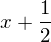

In [76]:
x + Rational(1,2)

数字と記号の除法の場合は/を使って構わない

In [77]:
x/2

In [78]:
Rational(x,2)

TypeError: invalid input: x

## 多項式

### 多項式の定義

多項式を定義するにはsympifyを使う

sympifyはstr型のオブジェクトをsympy表現に変換する

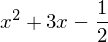

In [82]:
str_expr = 'x**2 + 3*x -1/2'
expr = sympify(str_expr)
expr

In [83]:
type(expr)

sympy.core.add.Add

### 多項式の演算

#### 展開

$$
(x+1)^2
$$

In [85]:
expand((x + 1)**2)

`expand`は式の整理まで行う

$$
(x + 1)(x - 2) - (x - 1) x
$$

In [86]:
expand((x + 1)*(x - 2) - (x - 1)*x)

#### 因数分解

$$
x^3 - x^2 + x - 1
$$

In [87]:
factor(x**3 - x**2 + x -1)

$$
x^2 z + 4 x y z + 4 y^2 z
$$

In [95]:
factor(x**2*z + 4*x*y*z + 4*y**2*z)

因数を取り出したいときには`factor_list`を使う

In [97]:
factor_list(x**2*z + 4*x*y*z + 4*y**2*z)

#### 指数ごとの整理

In [25]:
expr = x*y + x - 3 + 2*x**2 - z*x**2  + x**3
expr

In [23]:
collected_expr = collect(expr,x)

In [24]:
collected_expr

係数の取り出しは`coeff`メソッド

In [117]:
collected_expr.coeff(x, 2)

#### 分数の整理

$$
\frac{x^2 + 2x + 1}{x^2 + x}
$$

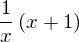

In [121]:
cancel((x**2 + 2*x +1)/(x**2 + x))

In [26]:
cancel(1/x)

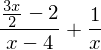

In [118]:
expr = 1/x + (3*x/2 -2)/(x - 4)
expr

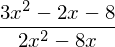

In [119]:
cancel(expr)

#### 指数

In [28]:
x, y = symbols('x y', positive=True)
a, b = symbols('a b', real=True)
z, t, c = symbols('z t c')

In [29]:
powsimp(x**a*x**b)

In [30]:
powsimp(x**a * y**a)

In [136]:
powsimp(t**c * z**c)

#### 対数 

In [31]:
x, y = symbols('x y', positive = True)
n = symbols('n', real = True)
z = symbols('z')

In [141]:
log(x) # 自然対数

In [32]:
ln(x)

In [140]:
expand_log(log(x*y))

In [142]:
expand_log(log(x/y))

In [144]:
expand_log(log(x**n))

In [146]:
logcombine(log(x)+log(y))

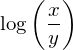

In [147]:
logcombine(log(x)-log(y))

In [148]:
logcombine(n*log(x))

In [150]:
logcombine(z*log(x))

#### 極限

$$
\lim_{x \to 0} \frac{\sin(x)}{x}
$$

In [179]:
limit(sin(x)/x,x,0)

$$
\lim_{x \to 0^+} \frac{1}{x}
$$

In [181]:
limit(1/x,x,0,'+')

$$
\lim_{x \to 0^-}\frac{1}{x}
$$

In [182]:
limit(1/x,x,0,'-')

#### 微分

In [152]:
diff(log(x),x)

In [153]:
diff(exp(x**2),x)

高階微分はさらに変数を続けるだけでOK


In [154]:
diff(x**4,x,x,x)

または回数を直接指定

In [155]:
diff(x**4,x,3)

In [162]:
expr = exp(x*y*z)

In [163]:
diff(expr,x,y,y,z,z,z,z)

In [164]:
diff(expr,x,y,y,z,4)

In [165]:
diff(expr,x,y,2,z,4)

In [166]:
diff(expr,x,y,z,4,y)

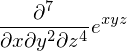

In [168]:
deriv = Derivative(expr,x,y,y,z,4)
deriv

In [169]:
deriv.doit()

#### 積分

$$
\int^\infty_0 \exp(-x)dx
$$

In [175]:
integrate(exp(-x),(x,0,oo))

$$
\int^\infty_{-\infty} \int^\infty_{-\infty}\exp(-x^2-y^2)dx dy
$$

In [176]:
integrate(exp(-x**2 - y**2),(x,-oo,oo),(y,-oo,oo))

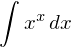

In [178]:
expr = integrate(x**x,x)
expr

#### 級数展開

$$
\exp(\sin(x))
$$

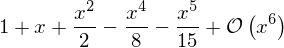

In [36]:
expr = exp(sin(x))
expr.series(x,0)

#### 方程式

In [37]:
x, y = symbols('x y')

$$
x^2 = 1
$$

In [216]:
solve(Eq(x**2,1),x)

In [217]:
solve(Eq(x**2 - 1, 0), x)

In [218]:
solve(x**2-1, x)

`solve`は必ずしも全ての解を見つけられるわけではない

$$
\cos(x) = x
$$

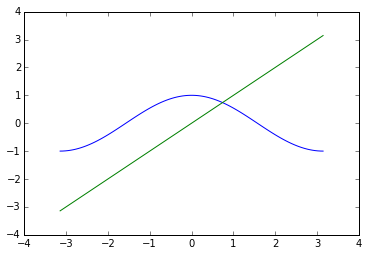

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
x = np.linspace(-np.pi, np.pi, 100)
plt.plot(x, np.cos(x))
plt.plot(x, x)
plt.show()

In [219]:
solve(x-cos(x),x)

NotImplementedError: multiple generators [x, cos(x)]
No algorithms are implemented to solve equation x - cos(x)

連立方程式に対しても`solve`が使える

$$
\begin{cases}
x-y+2=0\\
x+y-3=0
\end{cases}
$$

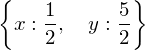

In [227]:
solve([x - y + 2, x + y -3], [x, y])

In [228]:
sol = solve([x - y + 2, x + y -3], [x, y])

In [229]:
type(sol)

dict

In [233]:
sol[x]

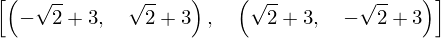

In [234]:
solve([x*y - 7, x + y - 6], [x, y])

In [244]:
sol = solve([x*y - 7, x + y - 6], [x, y])
type(sol)

list

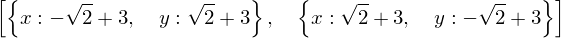

In [245]:
solve([x*y - 7, x + y - 6], [x, y], dict=True)

In [246]:
sol = solve([x*y - 7, x + y - 6], [x, y], dict=True)
sol[0][x] # solはdict型の解のリストであることに注意

重解の有無は`root`を使って調べる

$$
x^3 - 6 x^2 + 9x
$$

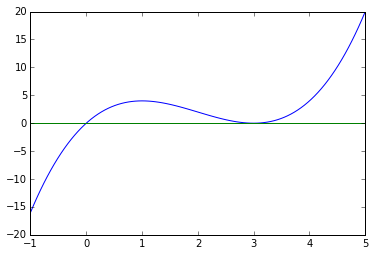

In [2]:
fig, ax = plt.subplots()
x = np.linspace(-1,5,100)
plt.plot(x, x**3 - 6*x**2 + 9*x)
plt.plot(x, np.zeros(100))
plt.show()

In [260]:
roots(x**3 - 6*x**2 + 9*x,x)

##### 応用：効用最大化

$$
\begin{align}
&\max_{(x,y) \in \mathbb R_+} x^\alpha y^{1-\alpha}\\
\text{s.t.}\ &p_x x + p_y y = m
\end{align}
$$
を一階条件を使って解く

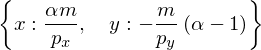

In [40]:
x, y ,px, py, m, alp = symbols('x y p_x p_y m alpha', positive=True) # 記号の定義
u = x**alp * y**(1-alp) # 効用関数の定義

f_order = Eq(diff(u,x)/diff(u,y),px/py) # 一階条件
budget = Eq(px*x + py*y,m) # 予算制約 

solve([f_order,budget],[x,y]) # 上の二式を連立して解く

#### 微分方程式

In [261]:
f, g = symbols('f g', cls=Function)

In [262]:
f(x)

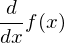

In [263]:
f(x).diff(x)

微分方程式
$$
f''(x)-2f'(x)+f(x)=\sin(x)
$$
を解く

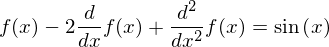

In [264]:
diffeq = Eq(f(x).diff(x,x) - 2*f(x).diff(x) + f(x), sin(x))
diffeq

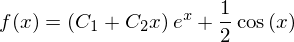

In [265]:
dsolve(diffeq, f(x))

#### 行列

行列は`Matrix`を使って表現する

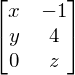

In [324]:
M = Matrix([[x, -1],[y, 4], [0, z]])
M

In [271]:
type(M)

sympy.matrices.dense.MutableDenseMatrix

In [269]:
Matrix([1, 2, 3])

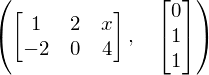

In [327]:
M = Matrix([[1, 2, x],[-2, 0, 4]])
N = Matrix([0, 1, 1])
M, N

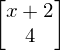

In [328]:
M*N

##### 行列の操作

In [298]:
M.shape

In [299]:
M.row(0) # 行の取り出し

In [300]:
M.col(-1) # 列の取り出し

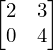

In [301]:
M.col_del(0) # 列の削除
M

In [302]:
M.row_del(1) # 行の削除
M

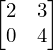

In [303]:
M = M.row_insert(1, Matrix([[0,4]]))
M

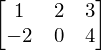

In [304]:
M = M.col_insert(0, Matrix([1,-2]))
M

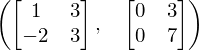

In [306]:
M = Matrix([[1, 3], [-2, 3]])
N = Matrix([[0, 3], [0, 7]])
M, N

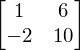

In [307]:
M + N # 行列の和

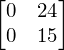

In [308]:
M*N # 行列の積

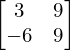

In [309]:
3*M # スカラー倍

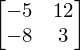

In [310]:
M**2

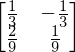

In [312]:
M**-1 # 逆行列

In [313]:
N**-1

ValueError: Matrix det == 0; not invertible.

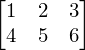

In [318]:
M = Matrix([[1, 2, 3], [4, 5, 6]])
M

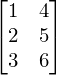

In [319]:
M.T # 転置

##### 行列の生成

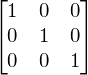

In [320]:
eye(3) # 単位行列

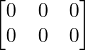

In [321]:
zeros(2, 3) # ゼロ行列

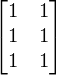

In [322]:
ones(3, 2)

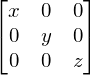

In [323]:
diag(x, y, z) # 対角行列